In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils

/home/p3rzival/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('summary/summarized_data.csv', index_col=['ViT Name'])
df["Accuracy"] = df["Accuracy"]/100

In [4]:
original_acc = df.filter(regex="ViT-Defa*", axis=0)["Accuracy"].item()
original_time = df.filter(regex="ViT-Defa*", axis=0)["Total Latency"].item()
original_mem = df.filter(regex="ViT-Defa*", axis=0)["Max Mem use"].item()

In [5]:
merging = [10, 15, 20, 25, 30, 5] * 8
merging = [10, 15, 20, 25, 30, 5]
pruning = [0.1]*6 + [0.2]*6 + [0.3]*6 + [0.4]*6 + [0.5]*6 + [0.6]*6 + [0.7]*6 + [0.8]*6
pruning = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [6]:
name = "MQuant"

In [7]:
combined = df.filter(regex='ViT-Combine-Mer.*', axis=0)
print(combined.head)
combined["Pruning"] = merging
#combined["Merging"] = merging

<bound method NDFrame.head of                                  Accuracy  Max Mem use  Mem Latency  \
ViT Name                                                              
ViT-Combine-Merging10-Quantized    0.9472   183.556152     0.207412   
ViT-Combine-Merging15-Quantized    0.9439   183.343262     0.206288   
ViT-Combine-Merging20-Quantized    0.9244   183.299316     0.203310   
ViT-Combine-Merging25-Quantized    0.9005   183.255371     0.201542   
ViT-Combine-Merging30-Quantized    0.8819   183.023438     0.205965   
ViT-Combine-Merging5-Quantized     0.9491   183.242188     0.202321   

                                 Inference Latency  Total Latency  
ViT Name                                                           
ViT-Combine-Merging10-Quantized           5.681480       5.888892  
ViT-Combine-Merging15-Quantized           5.730487       5.936775  
ViT-Combine-Merging20-Quantized           5.713740       5.917050  
ViT-Combine-Merging25-Quantized           5.659542       5.86

/tmp/ipykernel_105692/2219777769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Pruning"] = merging


In [ ]:
diff_latency = original_time - combined["Total Latency"]
diff_mem = original_mem - combined["Max Mem use"]
diff_acc = original_acc - combined["Accuracy"]

tradeoff_latency = (diff_latency/original_time)/(diff_acc/original_acc + 0.1) * (combined["Accuracy"]**2)
tradeoff_mem = (diff_mem/original_mem)/(diff_acc/original_acc + 0.1) * (combined["Accuracy"]**2)

print(diff_acc)

ViT Name
ViT-Combine-Merging10-Quantized    0.0021
ViT-Combine-Merging15-Quantized    0.0054
ViT-Combine-Merging20-Quantized    0.0249
ViT-Combine-Merging25-Quantized    0.0488
ViT-Combine-Merging30-Quantized    0.0674
ViT-Combine-Merging5-Quantized     0.0002
Name: Accuracy, dtype: float64


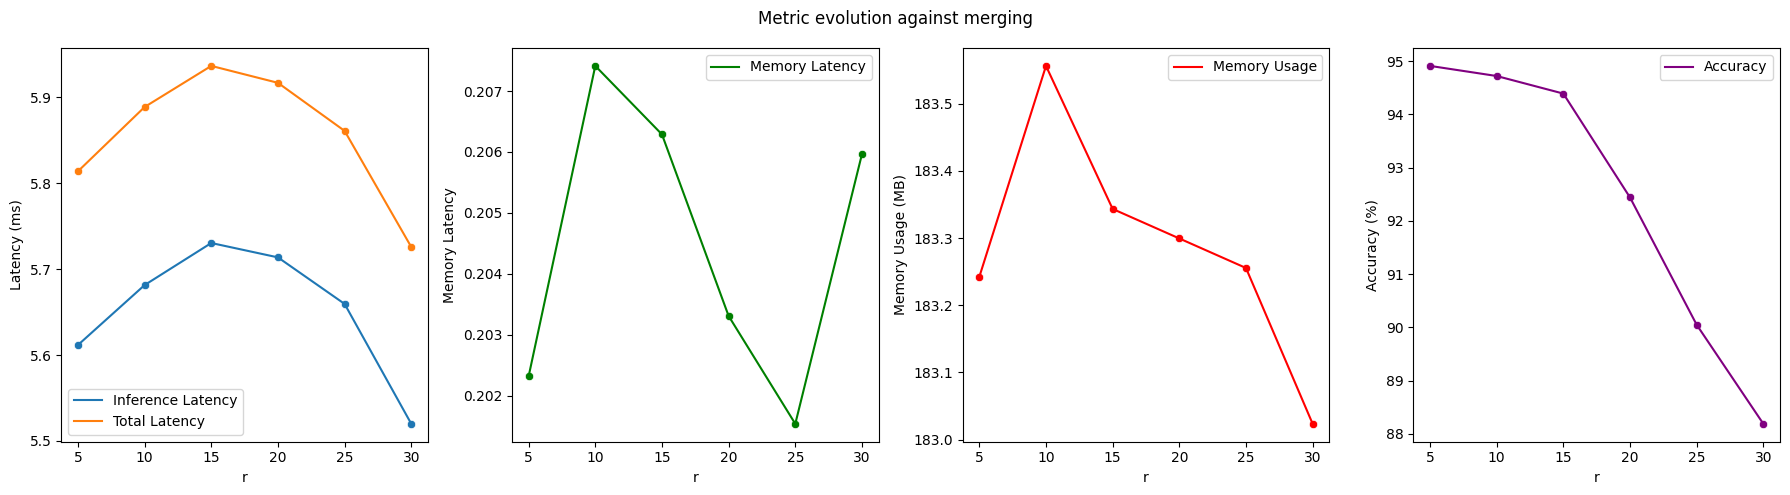

In [31]:
fig, axes = plt.subplots(1,4, figsize=(18, 5))
sns.lineplot(combined, x="Pruning", y="Inference Latency",errorbar=None, label="Inference Latency", ax=axes[0])
sns.lineplot(combined, x="Pruning", y="Total Latency",errorbar=None, label="Total Latency", ax=axes[0])
sns.scatterplot(combined, x="Pruning", y="Inference Latency", ax=axes[0])
sns.scatterplot(combined, x="Pruning", y="Total Latency", ax=axes[0])
axes[0].set_xlabel("r")
axes[0].set_ylabel("Latency (ms)")
axes[0].legend()

sns.lineplot(combined, x="Pruning", y="Mem Latency",errorbar=None, label="Memory Latency", ax=axes[1], color='green')
sns.scatterplot(combined, x="Pruning", y="Mem Latency", ax=axes[1], color='green')
axes[1].set_xlabel("r")
axes[1].set_ylabel("Memory Latency")
axes[1].legend()

sns.lineplot(combined, x="Pruning", y="Max Mem use",errorbar=None, label="Memory Usage", ax=axes[2], color='red')
sns.scatterplot(combined, x="Pruning", y="Max Mem use", ax=axes[2], color='red')
axes[2].set_xlabel("r")
axes[2].set_ylabel("Memory Usage (MB)")
axes[2].legend()

sns.lineplot(combined, x="Pruning", y="Accuracy",errorbar=None, label="Accuracy", ax=axes[3], color='purple')
sns.scatterplot(combined, x="Pruning", y="Accuracy", ax=axes[3], color='purple')
axes[3].set_xlabel("r")
axes[3].set_ylabel("Accuracy (%)")
axes[3].legend()

fig.suptitle("Metric evolution against merging")
plt.tight_layout()
plt.savefig(f"summary/globalGraphs/{name}-Metrics.png")
plt.show()

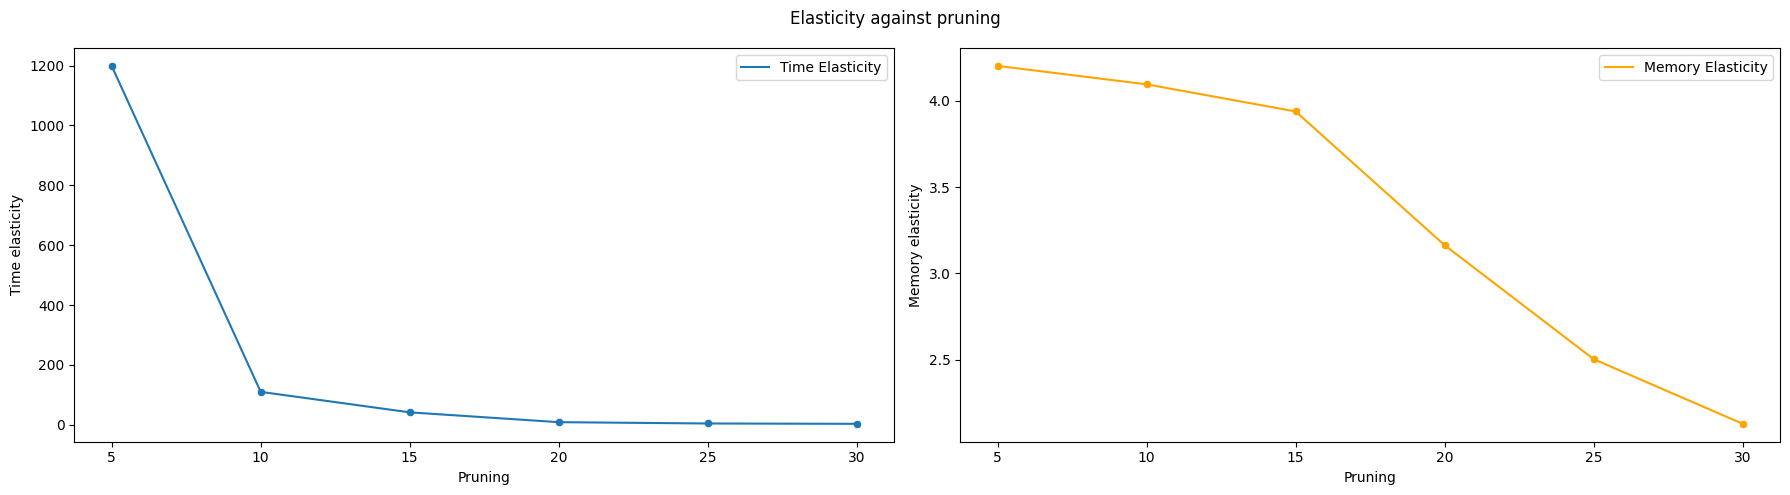

In [9]:
fig, axes = plt.subplots(1,2, figsize=(18, 5))
sns.lineplot(x=combined["Pruning"], y=tradeoff_latency, label="Time Elasticity",errorbar=None, ax=axes[0])
sns.scatterplot(x=combined["Pruning"], y=tradeoff_latency, ax=axes[0])
axes[0].set_ylabel("Time elasticity")
axes[0].set_xlabel("Pruning")
axes[0].legend()

sns.lineplot(x=combined["Pruning"], y=tradeoff_mem ,errorbar=None, label="Memory Elasticity", ax=axes[1], color='orange')
sns.scatterplot(x=combined["Pruning"], y=tradeoff_mem, ax=axes[1], color='orange')
axes[1].set_ylabel("Memory elasticity")
axes[1].set_xlabel("Pruning")
axes[1].legend()


fig.suptitle(f"Elasticity against pruning")
plt.tight_layout()
plt.savefig(f"summary/globalGraphs/{name}-Elasticity.png")
plt.show()

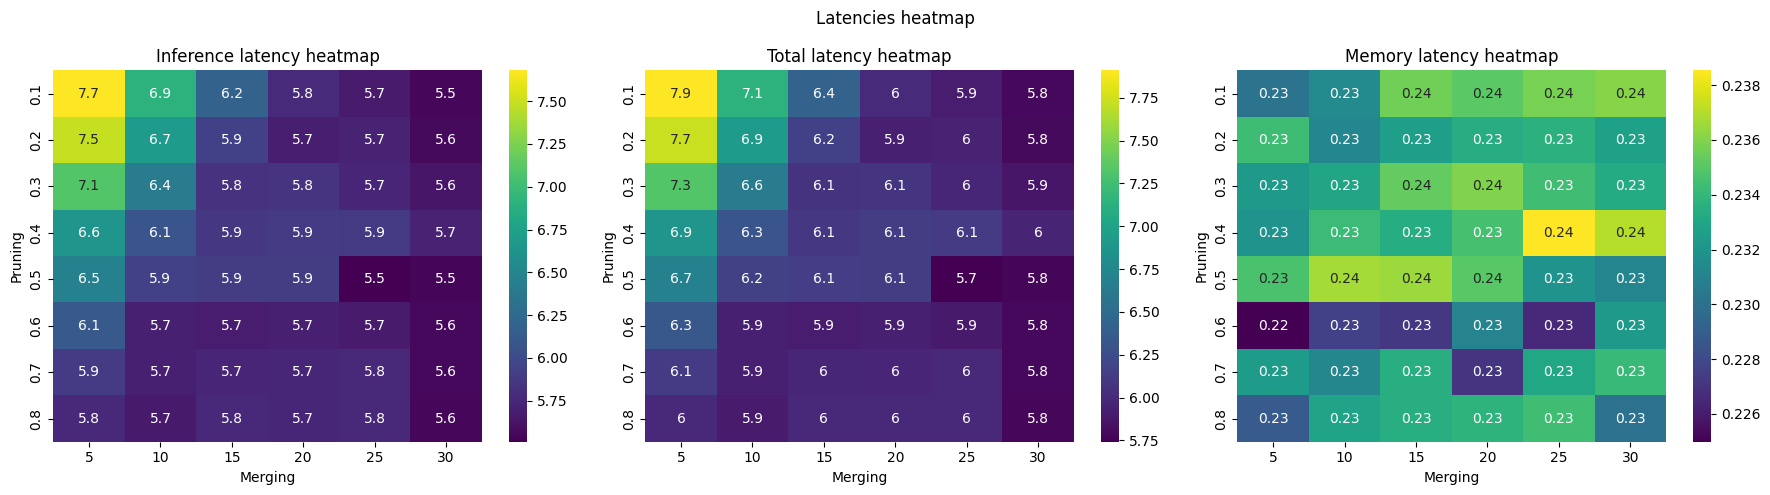

In [31]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))
heat = combined.pivot(index="Pruning", columns="Merging", values="Inference Latency")
sns.heatmap(heat, cmap='viridis', annot=True, ax=axes[0])
axes[0].set_title("Inference latency heatmap")

heat = combined.pivot(index="Pruning", columns="Merging", values="Total Latency")
sns.heatmap(heat, cmap='viridis', annot=True, ax=axes[1])
axes[1].set_title("Total latency heatmap")

heat = combined.pivot(index="Pruning", columns="Merging", values="Mem Latency")
sns.heatmap(heat, cmap='viridis', annot=True, ax=axes[2])
axes[2].set_title("Memory latency heatmap")


fig.suptitle(f"Latencies heatmap")
plt.tight_layout()
plt.savefig(f"summary/globalGraphs/Combine/{name}-Latencies.png")
plt.show()

/tmp/ipykernel_102952/1653635744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Max Mem use"] = np.log(combined["Max Mem use"])


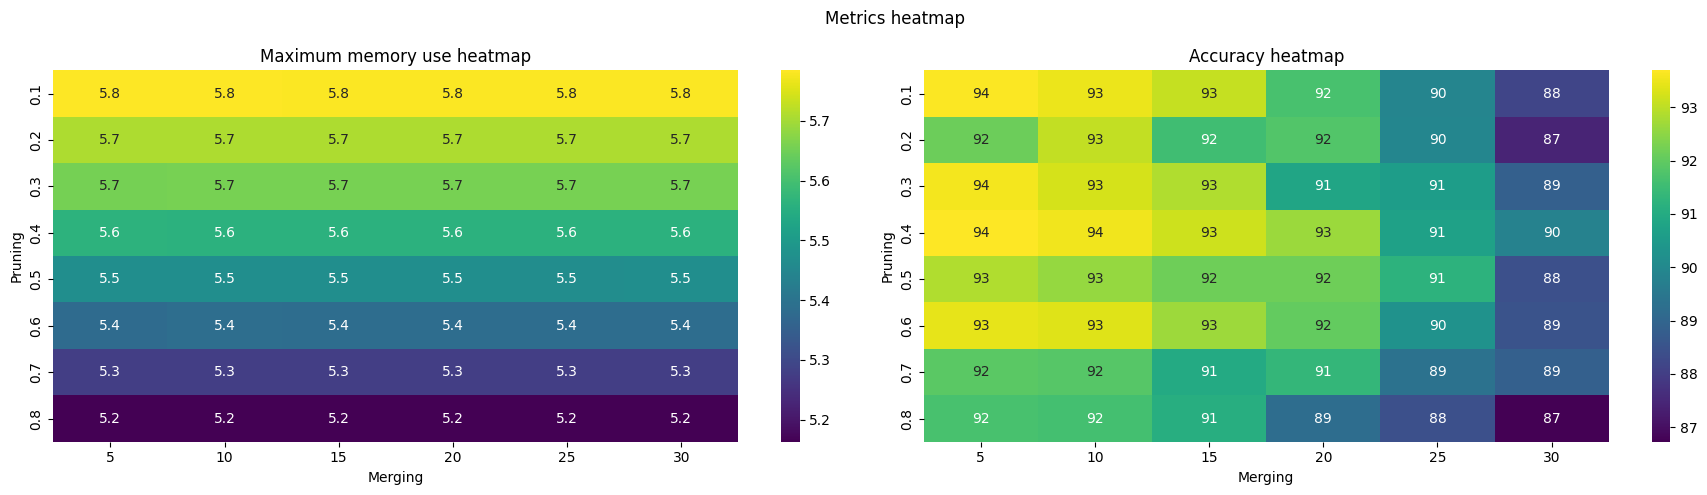

In [32]:
fig, axes = plt.subplots(1,2, figsize=(18, 5))
combined["Max Mem use"] = np.log(combined["Max Mem use"])

heat = combined.pivot(index="Pruning", columns="Merging", values="Max Mem use")
sns.heatmap(heat, cmap='viridis', annot=True, ax=axes[0])
axes[0].set_title("Maximum memory use heatmap")

heat = combined.pivot(index="Pruning", columns="Merging", values="Accuracy")
sns.heatmap(heat, cmap='viridis', annot=True, ax=axes[1])
axes[1].set_title("Accuracy heatmap")

fig.suptitle(f"Metrics heatmap")
plt.tight_layout()
plt.savefig(f"summary/globalGraphs/Combine/{name}-Rest.png")
plt.show()

In [16]:
diff_latency = original_time - combined["Total Latency"]
diff_mem = original_mem - combined["Max Mem use"]
diff_acc = original_acc - combined["Accuracy"]

tradeoff_latency = (diff_latency/original_time)/(diff_acc/original_acc) * (combined["Accuracy"]**2)
tradeoff_mem = (diff_mem/original_mem)/(diff_acc/original_acc) * (combined["Accuracy"]**2)

combined["Values time"] = tradeoff_latency
combined["Values mem"] = tradeoff_mem

/tmp/ipykernel_102952/225011698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Values time"] = tradeoff_latency
/tmp/ipykernel_102952/225011698.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Values mem"] = tradeoff_mem


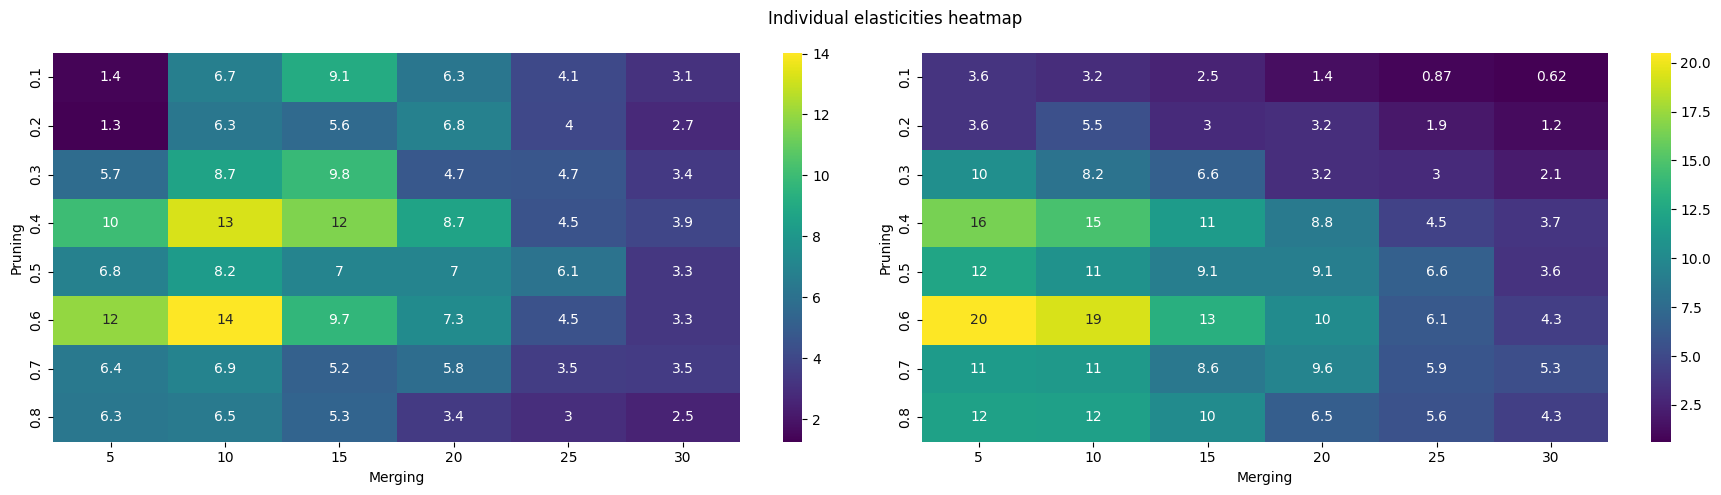

In [17]:
fig, axes = plt.subplots(1,2, figsize=(18, 5))
heat = combined.pivot(index="Pruning", columns="Merging", values="Values time")
sns.heatmap(heat, cmap='viridis', annot=True, ax=axes[0])

heat = combined.pivot(index="Pruning", columns="Merging", values="Values mem")
sns.heatmap(heat, cmap='viridis', annot=True, ax=axes[1])


fig.suptitle(f"Individual elasticities heatmap")
plt.tight_layout()
plt.savefig(f"summary/globalGraphs/Combine/{name}.png")
plt.show()

/tmp/ipykernel_102952/3773826930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Values average"] = (tradeoff_latency + tradeoff_mem)/2


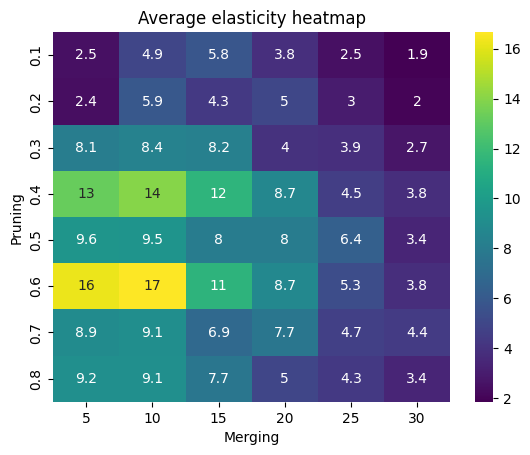

In [18]:
combined["Values average"] = (tradeoff_latency + tradeoff_mem)/2
heat = combined.pivot(index="Pruning", columns="Merging", values="Values average")
sns.heatmap(heat, cmap='viridis', annot=True)

plt.title(f"Average elasticity heatmap")
plt.savefig(f"summary/globalGraphs/Combine/{name}-Average.png")
plt.show()